In [1]:
# Authors: Samantha Tetef and Vikram Kashyap
# Date: Winter 2020-2021 to Summer 2021

In [218]:
import utils
from utils import *
from importlib import reload

# to reload utils, run:
utils = reload(utils)
from utils import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.colors import to_hex
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
import mplcursors

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN

import umap

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy

from itertools import compress

from pathlib import Path

import webbrowser

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [4]:
# bins = [5, 9, 20, 30, 25]
# hist(bins, np.arange(2017,2022), verbose=True, xlabel='Year', colormap=plt.cm.tab20_r)

In [5]:
ROOTDIR = Path()

CIDdir = ROOTDIR/"ProcessedData"
Listdir = ROOTDIR/"Categories"

X_data = get_Data(Listdir)

In [6]:
X_data_classed = [c for c in X_data if c['Class']!='None']
compoundmap = {compound['CID']:compound for compound in X_data_classed}

CIDs = np.array([c['CID'] for c in X_data_classed])
NoneCIDs = np.array([c['CID'] for c in X_data if c['Class']=='None'])

# CLASSSIFICATION MAPS
# classes
classcodemap = {compound['CID']:CLASSCODES[compound['Class']] for compound in X_data_classed
                if compound['Class'] in CLASSCODES.keys()}
# coordination
coordcodemap = {compound['CID']:COORDCODES[compound['Class']] for compound in X_data_classed
                if compound['Class'] in COORDCODES.keys()}
# phosphorane subclasses
phosphoranecodemap = {compound['CID']:PHOSPHORANECODES[compound['Class']] for compound in X_data_classed
                      if compound['Class'] in PHOSPHORANECODES.keys()}
# phosphorane subclasses
sulfurcodemap = {compound['CID']:SULFURCODES[compound['Class']] for compound in X_data_classed
                 if compound['Class'] in SULFURCODES.keys()}
# chargemap
# chargemap = {compound['CID']:compound['Charge'] for compound in X_data_classed if compound['Charge'] != -1}
chargemap = {compound['CID']:compound['Charge'] for compound in X_data_classed}

classnames = list(CLASSCODES.keys())[:-1]

XANES_energies = X_data[0]['XANES_Spectra'][0]
XES_energies = X_data[0]['XES_Spectra'][0]

In [7]:
len(X_data_classed)

852

In [8]:
# good, bad = 0, 0
# diff = []
# really_bad = []
# for compound in X_data_classed[5:]:
#     x, y = compound['XANES_Transitions']
#     x = x + 50
#     whiteline_E = x[-5:][np.argmax(y[-5:])]
#     max_E = 10
    
#     last_trans = x[0]
#     e_diff = last_trans - whiteline_E
#     diff.append(e_diff)
    
#     if e_diff < 8:
#         really_bad.append(compound['CID'])
    
#     if e_diff > max_E:
#         good += 1
#     else:
#         bad += 1

# diff = np.array(diff)
# print(f'{good} good vs {bad} bad')
# print(np.average(diff), ' +/- ', np.std(diff))

In [9]:
# fig, ax = plt.subplots(figsize=(16,6))
# diff = diff[diff < 25]
# plt.hist(diff, bins=18*2+1, edgecolor='w', facecolor='green')
# plt.xlim(7,22)
# plt.yticks(fontsize=18)
# plt.xticks(np.arange(7,26), fontsize=18)
# plt.show()

In [10]:
# for c in X_data_classed:
#     if c['CID'] in really_bad:
#         x, y = c['XANES_Transitions']
#         plot_spectrum_and_trans(c['XANES_Spectra'], (x+50,y), c['CID'])

# Visualization of Classification Distributions

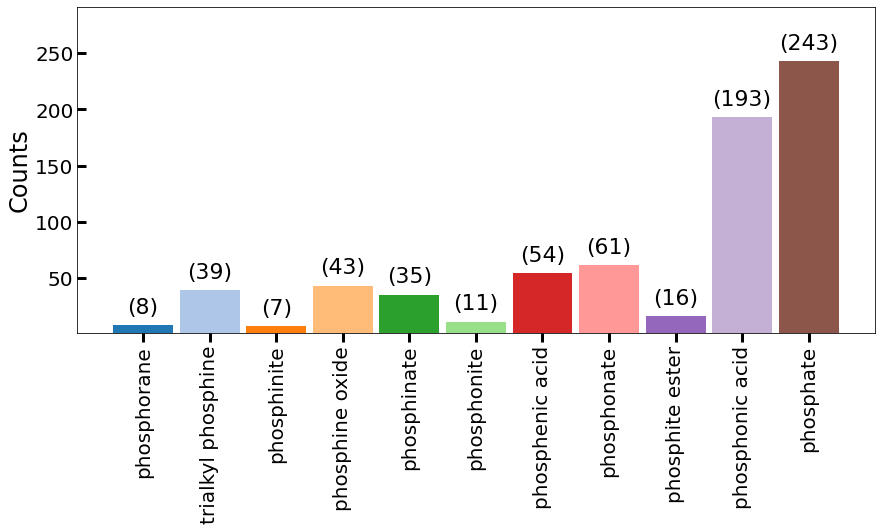

In [11]:
# bins = [1 for classname in classnames]
# hist(bins, [c.replace('_', ' ') for c in classnames], verbose=False)

coord_classnames = list(COORDCODES.keys())
# bins = [1 for classname in coord_classnames]
bins = [len([c for c in X_data if c['Class']==classname]) for classname in coord_classnames]
hist(bins, [c.replace('_', ' ') for c in coord_classnames], verbose=True)

# bins = [1 for coord in [3,4]]
# hist(bins, np.array([3,4]), verbose=False, xlabel='Coordination')

# Theory and Experiment Comparison

In [12]:
# checkcids = [11776, 13097, 8289]

# for cid in checkcids:    
#     c = compoundmap[cid]
#     trans = c['XANES_Transitions']
#     trans = esnip(trans, c['XANES_Normalized'], energy=XANES_energies, mode='xanes')
#     plot_spectrum_and_trans([XANES_energies, c['XANES_Normalized']], trans, f'{cid}', label='XANES')

In [13]:
# df1 = pd.read_csv('ExperimentalData/Ph3P.csv')
# df2 = pd.read_csv('ExperimentalData/Ph3PO.csv')
# df3 = pd.read_csv('ExperimentalData/PhO3PO.csv')

# hc = 1.23984193e-6 #ev/m
# d = 6.5327e-10 #m
# def to_energy(two_theta):
#     return hc/(d*np.sin(two_theta*(np.pi/180)/2))


# def stack_plot(Spectrums, Labels, title=None,
#                verbose=True, label=None, peaknorm=True):
    
#     n = len(Spectrums)
#     Colors=plt.cm.viridis(np.arange(n)/(n+1))
#     if n == 2:
#         Colors=['black', 'red']
#     fig, ax = plt.subplots(figsize=(10,8))

#     i = 0
#     for spectrum in Spectrums:
#         x, y = spectrum
#         if peaknorm:
#             y = y/np.max(y)
#         ax.plot(x, y, '-', color=Colors[i], linewidth=2, label=Labels[i])
#         i += 1

#     if title is not None:
#         plt.title(title, fontsize=20)
#     plt.xlabel('Energy (eV)', fontsize=18)
#     plt.tick_params(labelsize=16)

#     if verbose:
#         ax.xaxis.set_major_locator(MultipleLocator(5))
#         ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#         ax.xaxis.set_minor_locator(MultipleLocator(1))
#         ax.tick_params(direction='in', width=1, length=5, which='minor')

#     ax.tick_params(direction='in', width=2, length=8, which='major')

#     plt.legend(fontsize=20)
    
#     plt.show()

    
# ####################### spectrum 1
# cid = checkcids[0]
# x = to_energy(df1['2theta'].values)
# y = df1['I'].values
# y = y - np.min(y)
# y = y/np.max(y)
# emin, emax = 350, 800
# x2 = XES_energies[emin:emax]
# c = compoundmap[cid]
# y2 = c['XES_Normalized'][emin:emax]
# e_shift = x2[np.argmax(y2)] - x[np.argmax(y)]
# stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$Ph_3P$")

# ####################### spectrum 2
# cid = checkcids[2]
# x = to_energy(df3['2theta'].values)
# y = df3['I'].values
# y = y - np.min(y)
# y = y/np.max(y)
# emin, emax = 410, 750
# x2 = XES_energies[emin:emax]
# c = compoundmap[cid]
# y2 = c['XES_Normalized'][emin:emax]
# stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$PhO_3PO$", verbose=True)

# ML and Data Science section

## All Spectra Together

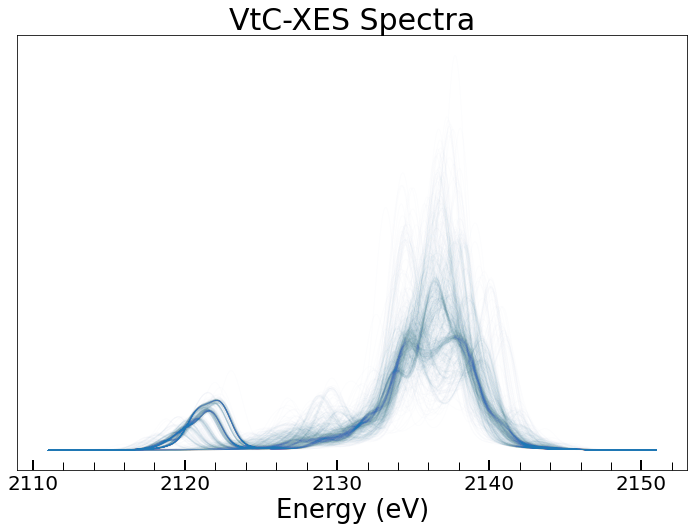

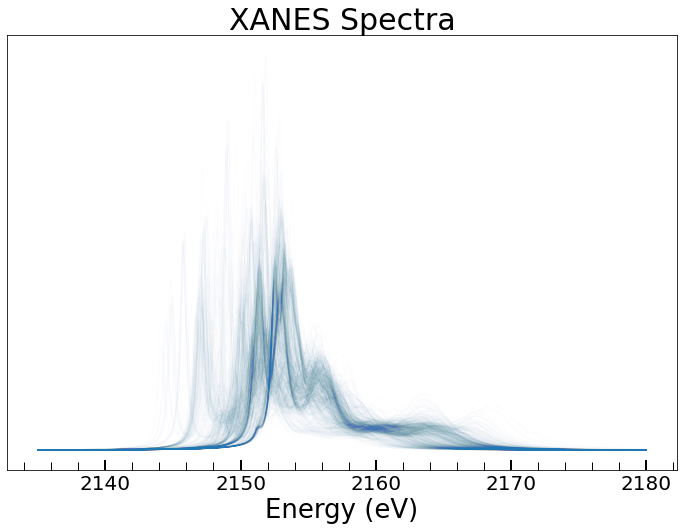

In [14]:
xesplt = plot_spaghetti(plt.subplots(figsize=(12,8)), compoundmap, mode='XES', coloralpha=0.01)
xanesplt = plot_spaghetti(plt.subplots(figsize=(12,8)), compoundmap, mode='XANES', coloralpha=0.01)

## Rainbow Spaghetti Plot: Color and Stack by Coordination

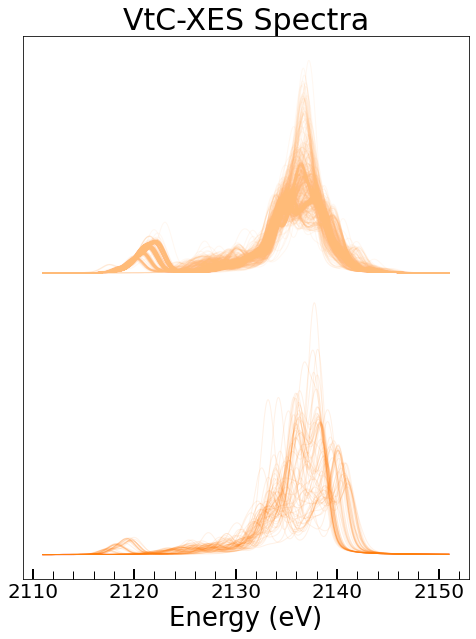

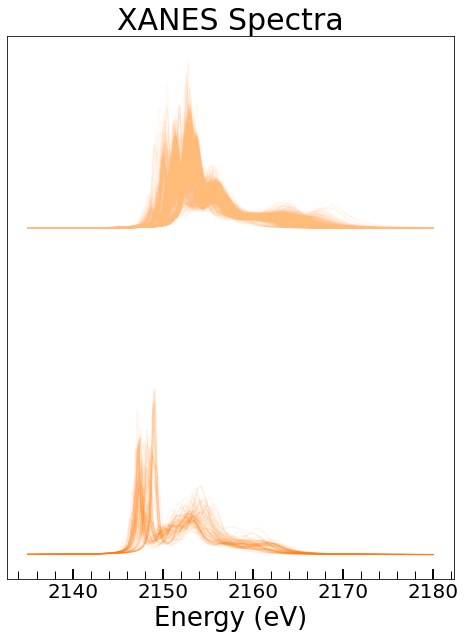

In [15]:
codemap = coordcodemap

hiddenCIDS = np.array([c['CID'] for c in X_data if not c['CID'] in codemap.keys()])

xesspagplt = plot_spaghetti(plt.subplots(figsize=(8,10)), compoundmap, colorcodemap=codemap, binmap=codemap,
               mode='XES', coloralpha=0.1, hiddencids=hiddenCIDS, colormap=plt.cm.tab10, hiddenalpha=0, scale=False)
xanesspagplt = plot_spaghetti(plt.subplots(figsize=(8,10)), compoundmap, colorcodemap=codemap, binmap=codemap,
               mode='XANES', coloralpha=0.1, hiddencids=hiddenCIDS, colormap=plt.cm.tab10, hiddenalpha=0, scale=False)

# Dimensionality Reduction

# PCA + t-SNE

In [16]:
XES = np.array([c['XES_Normalized'] for c in X_data_classed])
XANES = np.array([c['XANES_Normalized'] for c in X_data_classed])

# pca
pca_all_xes = PCA()
XES_PCA = pca_all_xes.fit_transform(XES)
pca_all_xanes = PCA()
XANES_PCA = pca_all_xanes.fit_transform(XANES)

N = XANES_PCA.shape[1]

explained_var_xes = np.array([np.sum(pca_all_xes.explained_variance_ratio_[:i+1]) for i in range(N)])
explained_var_xanes = np.array([np.sum(pca_all_xanes.explained_variance_ratio_[:i+1]) for i in range(N)])

threshold_xes = np.where(explained_var_xes >= 0.9)[0][0]
threshold_xanes = np.where(explained_var_xanes >= 0.9)[0][0]

print(f"VtC-XES takes {threshold_xes+1} PCs to explain {explained_var_xes[threshold_xes]:.04f} variance")
print(f"XANES takes {threshold_xanes+1} PCs to explain {explained_var_xanes[threshold_xanes]:.04f} variance")

VtC-XES takes 6 PCs to explain 0.9113 variance
XANES takes 12 PCs to explain 0.9116 variance


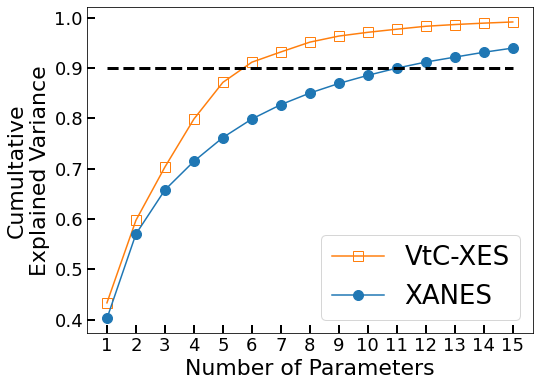

In [17]:
def make_stacked_scree(xes, xanes, n=None):
    
    if n is None:
        n = len(xanes)
    else:
        xes = xes[:n]
        xanes = xanes[:n]

    fig, ax = plt.subplots(figsize=(8,6))

    x = np.arange(n)+1
    
    cdf_xes = [np.sum(xes[:i+1]) for i in range(n)]
    cdf_xanes = [np.sum(xanes[:i+1]) for i in range(n)]

    ax.plot(x, cdf_xes, 's-', markersize=10, fillstyle='none', color=plt.cm.tab10(.15), label='VtC-XES')
    ax.plot(x, cdf_xanes, 'o-', markersize=10, color=plt.cm.tab10(0.05), label='XANES')
    ax.plot(x, np.ones(len(x))*0.9, 'k--', linewidth=3)

    plt.xticks(x, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Number of Parameters', fontsize=22)
    plt.ylabel(f'Cumultative\nExplained Variance', fontsize=22)
    ax.tick_params(direction='in', width=2, length=8)
    
    plt.legend(fontsize=26)

    plt.savefig('../Figures/scree', dpi=800, transparent=True, bbox_inches='tight')
    plt.show()
    
make_stacked_scree(pca_all_xes.explained_variance_ratio_, pca_all_xanes.explained_variance_ratio_, n=15)

# Coordination

In [18]:
def get_subset_plots(X_data, mode='XANES', perplexity=5, method='tsne', **kwargs):
    
    if 'CID' in kwargs:
        if type(kwargs['CID'])==int:
            X_subset = [c for c in X_data if c['CID'] == kwargs['CID']]
        else:
            X_subset = [c for c in X_data if c['CID'] in kwargs['CID']]
    elif 'Class' in kwargs:
        X_subset = [c for c in X_data if c['Class'] in kwargs['Class']]
    elif 'Type' in kwargs:
        if type(kwargs['Type'])==int:
            X_subset = [c for c in X_data if c['Type'] == kwargs['Type']]
        else:
            X_subset = [c['CID'] for c in X_data if c['Type'] in kwargs['Type']]
           
    
    SPECTRA = np.array([c[f'{mode}_Normalized'] for c in X_subset])
    
    # pca
    pca_all = PCA()
    PCA_all = pca_all.fit_transform(SPECTRA)
    N = PCA_all.shape[1]
    explained_var = np.array([np.sum(pca_all.explained_variance_ratio_[:i+1]) for i in range(N)])
    threshold = np.where(explained_var >= 0.9)[0][0]
    
    pca_sub = PCA(n_components=threshold + 1)
    PCA_sub = pca_sub.fit_transform(SPECTRA)
    
    if method == 'tsne':
        # tsne
        tsne_sub = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        reduced_space = tsne_sub.fit_transform(PCA_sub)
    else:
        # umap
        umap_sub = umap.UMAP(random_state=42)
        reduced_space = umap_sub.fit_transform(PCA_sub)
        
    # Make CID->point maps
    map_sub = {compound['CID']:point for compound,point in zip(X_subset, reduced_space)}
    
    return X_subset, map_sub

In [19]:
def get_tsne_maps(codemap, xanes_perplexity=20, xes_perplexity=20):
    
    hiddenCIDS = np.array([c['CID'] for c in X_data if not c['CID'] in codemap.keys()])
    X_subset = [c for c in list(compoundmap.values()) if c['CID'] in codemap.keys()]

    XES = np.array([c['XES_Normalized'] for c in X_subset])
    XANES = np.array([c['XANES_Normalized'] for c in X_subset])

    # pca
    pca1 = PCA(n_components=6)
    XES_PCA = pca1.fit_transform(XES)

    # pca
    pca2 = PCA(n_components=12)
    XANES_PCA = pca2.fit_transform(XANES)

    # tsne
    tsne = TSNE(n_components=2, perplexity=xes_perplexity, random_state=42)
    XES_TSNE = tsne.fit_transform(XES_PCA)

    # tsne
    tsne = TSNE(n_components=2, perplexity=xanes_perplexity, random_state=42)
    XANES_TSNE = tsne.fit_transform(XANES_PCA)

    # Make CID->point maps
    XANES_tsnemap = {compound['CID']:point for compound,point in zip(X_subset, XANES_TSNE)}
    XES_tsnemap = {compound['CID']:point for compound,point in zip(X_subset, XES_TSNE)}
    
    return XES_TSNE, XANES_TSNE, XES_tsnemap, XANES_tsnemap, X_subset, hiddenCIDS

In [20]:
def get_umaps(codemap):
    
    hiddenCIDS = np.array([c['CID'] for c in X_data if not c['CID'] in codemap.keys()])
    X_subset = [c for c in list(compoundmap.values()) if c['CID'] in codemap.keys()]

    XES = np.array([c['XES_Normalized'] for c in X_subset])
    XANES = np.array([c['XANES_Normalized'] for c in X_subset])

    # pca
    pca1 = PCA(n_components=6)
    XES_PCA = pca1.fit_transform(XES)

    # pca
    pca2 = PCA(n_components=12)
    XANES_PCA = pca2.fit_transform(XANES)

    # umap
    umap_xes = umap.UMAP(random_state=42)
    XES_UMAP = umap_xes.fit_transform(XES_PCA)
    
    # umap
    umap_xanes = umap.UMAP(random_state=42)
    XANES_UMAP = umap_xanes.fit_transform(XANES_PCA)

    # Make CID->point maps
    XANES_map = {compound['CID']:point for compound,point in zip(X_subset, XANES_UMAP)}
    XES_map = {compound['CID']:point for compound,point in zip(X_subset, XES_UMAP)}
    
    return XES_UMAP, XANES_UMAP, XES_map, XANES_map, X_subset, hiddenCIDS

In [51]:
XES_TSNE, XANES_TSNE, XES_tsnemap, XANES_tsnemap, X_coord, hiddenCIDs = get_tsne_maps(coordcodemap)

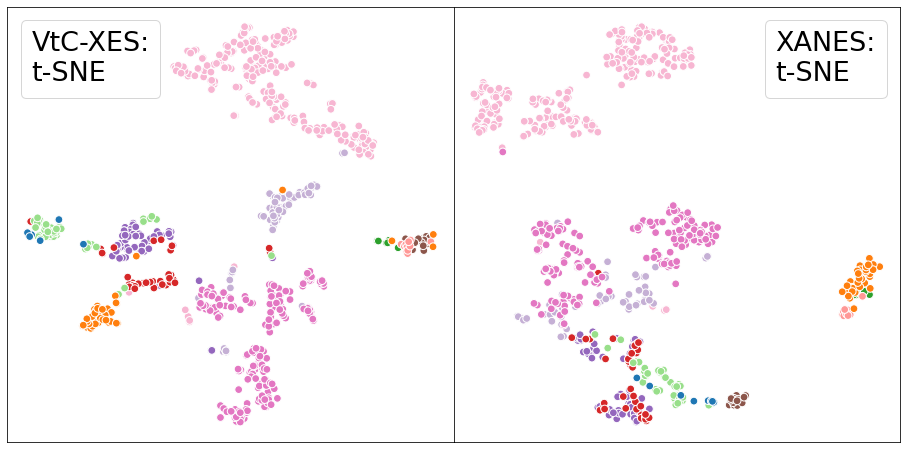

In [290]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
plt.subplots_adjust(wspace=0)
for mode in ['XES', 'XANES']:
    if mode == 'XES':
        tsnemap = XES_tsnemap
        col = 0
    else:
        tsnemap = XANES_tsnemap
        col = 1
    class_tsneplt = plot_dim_red((fig, axes[col]), X_coord, tsnemap, colorcodemap=classcodemap,
                                 mode=mode, method='t-SNE', hiddencids=hiddenCIDs, fontsize=27,
                                 size=60, edgecolors='w')

In [335]:
utils = reload(utils)
from utils import *

In [336]:
# %matplotlib inline

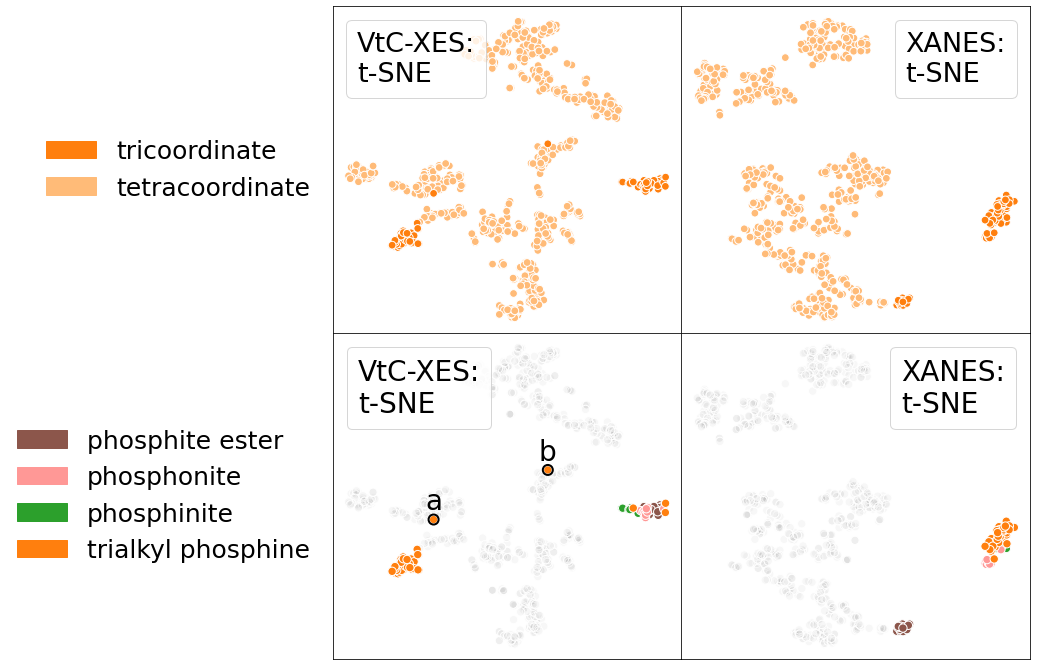

In [337]:
tricoord_classes = [k for k,v in COORDCODES.items() if v == 3]
kwargs = {'Class': tricoord_classes}

fig = plt.figure(figsize=(15,12))
spec = fig.add_gridspec(nrows=2, ncols=3, width_ratios=[0.4, 1, 1])
plt.subplots_adjust(wspace=0, hspace=0)

for mode in ['XES', 'XANES']:
    if mode == 'XES':
        tsnemap = XES_tsnemap
        col = 1
    else:
        tsnemap = XANES_tsnemap
        col = 2
        
    ax = fig.add_subplot(spec[0, col])
    tsneplt = plot_dim_red((fig, ax), X_coord, tsnemap,
                           colorcodemap=coordcodemap, size=60, edgecolors='w',
                           mode=mode, method='t-SNE', hiddencids=hiddenCIDs, fontsize=27)
    
    if mode == 'XES':
        label=['a', 'b']
        kwargs = {'Class': tricoord_classes, 'CID': [129643930, 10304870]}
    else:
        kwargs = {'Class': tricoord_classes}
        label = None
        
    ax = fig.add_subplot(spec[1, col])
    tricoord_tsneplt = plot_dim_red((fig, ax), X_coord, tsnemap, size=70,
                                     colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03,
                                     label=label, mode=mode, method='t-SNE', fontsize=28, edgecolors='w',
                                     **kwargs)
    if mode == 'XES':
        legend_labels = ['tricoordinate', 'tetracoordinate']
        ax = fig.add_subplot(spec[0, 0])
        make_legend((fig, ax), legend_labels, None, codes={'tricoordinate':3, 'tetracoordinate':4},
                         include_structures=False)
    else:
        legend_labels = ['phosphite_ester', 'phosphonite', 'phosphinite', 'trialkyl_phosphine']
        ax = fig.add_subplot(spec[1, 0])
        make_legend((fig,ax), legend_labels, None, include_structures=False)

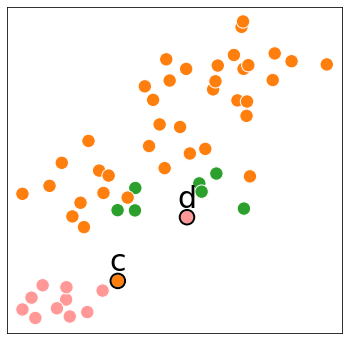

In [339]:
tricoord_classes = [k for k,v in COORDCODES.items() if v == 3]
tricoord_classes.remove('phosphite_ester')
figsize=(6,6)
kwargs = {'Class': tricoord_classes, 'CID': [136869, 118143996]}
label = ['c','d']
        
tricoord_tsneplt = plot_dim_red(plt.subplots(figsize=figsize), X_coord, XANES_tsnemap, size=180,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.0,
                                mode='XANES', method='t-SNE', fontsize=30, edgecolors='w',
                                label=label, show_legend=False, **kwargs) 

# Charge

C:\Users\saman\Downloads\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


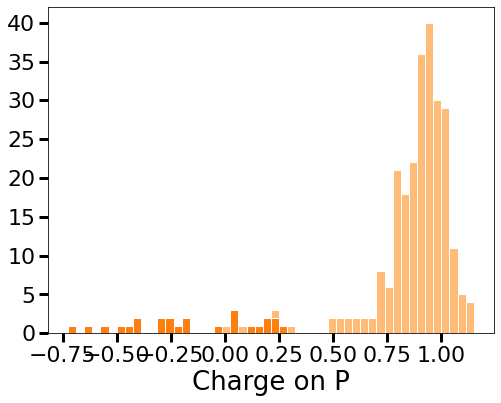

In [25]:
chargemap_coord = {compound['CID']:compound['Charge'] for compound in X_coord}
make_charge_hist(chargemap_coord, colorcodemap=coordcodemap)    

In [26]:
# hiddencids = [compound['CID'] for compound in X_coord if compound['Charge'] == -1]

# charge_kwargs = {'Charge': [-0.9,2.]}
# scaled_chargemap, min_charge, max_charge = get_scaled_chargemap(X_coord, hiddencids=hiddencids, **charge_kwargs)

# for mode in ['XES', 'XANES']:
#     if mode == 'XES':
#         tsnemap = XES_tsnemap
#     else:
#         tsnemap = XANES_tsnemap
#     tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, mode=mode,
#                             hiddenalpha=0.1, method='t-SNE', fontsize=20,
#                             colormap=plt.cm.viridis, hiddencids=hiddencids, size=30,
#                             colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
#                             cbarlim=(min_charge, max_charge), label=f'Charge on P\ncharge > {min_charge:.2f}',
#                             heatmap=True)

## Phosphate subclusters

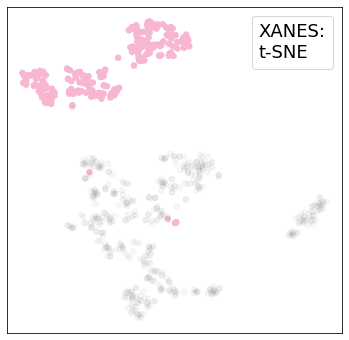

In [27]:
kwargs = {'Class': ['phosphate']}
tsne_plt = plot_dim_red(plt.subplots(figsize=(6,6)), X_coord, XANES_tsnemap, size=30,
                         colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03,
                         mode='XANES', method='t-SNE', fontsize=18, verbose=False, **kwargs)

In [28]:
tsne_phosphates = np.array([XANES_tsnemap[c['CID']] for c in X_data_classed if c['Class'] == 'phosphate'])
cids_phosphates = [c['CID'] for c in X_data_classed if c['Class'] == 'phosphate']

dbscan_clustering = DBSCAN(eps=4.5, min_samples=1).fit(tsne_phosphates)
dbscan_clustermap = {cid:cluster for cid,cluster in zip(cids_phosphates, dbscan_clustering.labels_)}

In [29]:
# %matplotlib inline

In [30]:
utils = reload(utils)
from utils import *

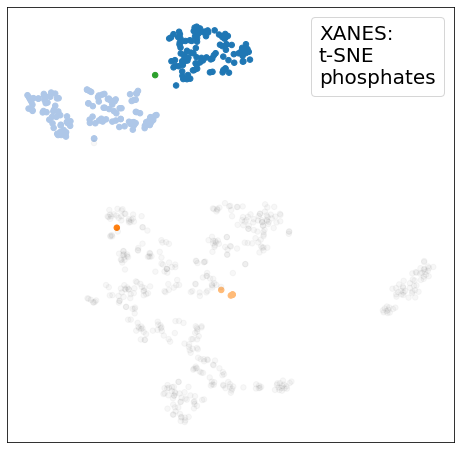

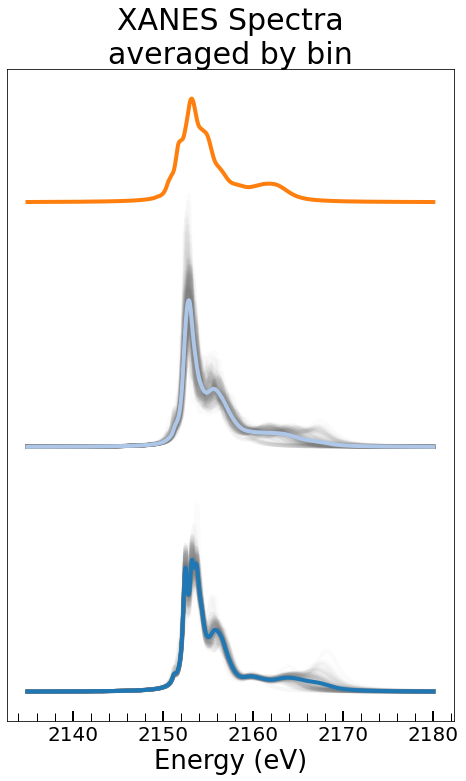

In [31]:
kwargs = {'Class': ['phosphate']}

############ plot all phosphates with clusters indicated by DBSCAN
phosphate_clustermap = {}
for c in X_data_classed:
    if c['Class'] == 'phosphate':
        phosphate_clustermap[c['CID']] = dbscan_clustermap[c['CID']] + 1
    else:
        phosphate_clustermap[c['CID']] = 0
              
select_clusters = [1,2,3]
X_phosphate = [c for c in X_data_classed if phosphate_clustermap[c['CID']] in select_clusters]

colorcodemap = {c['CID']:phosphate_clustermap[c['CID']] for c in X_data_classed \
          if phosphate_clustermap[c['CID']] in select_clusters}
binmap = {k:v*0.5 for k,v in colorcodemap.items()}

############ tsne plot all phosphates with clusters indicated by DBSCAN
tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XANES_tsnemap, size=30,
                        colorcodemap=phosphate_clustermap, coloralpha=1., hiddenalpha=0.03,
                        mode='XANES', method='t-SNE\nphosphates', fontsize=20, **kwargs)

# add_point_pubchem_link(tsne_plt, X_coord)
# add_point_label(tsne_plt, X_coord)

############ charge heatmap
hiddencids = [compound['CID'] for compound in X_coord if compound['Charge'] == -1]
charge_kwargs = {'Charge': [-0.9,2.]}
scaled_chargemap, min_charge, max_charge = get_scaled_chargemap(X_coord, hiddencids=hiddencids,
                                                                **Merge(kwargs, charge_kwargs))

chargemap_phosphates = {compound['CID']:compound['Charge'] for compound in X_phosphate}
# make_charge_hist(chargemap_phosphates, label='Charge on P\nphosphates', bins=30, colorcodemap=colorcodemap)

for mode in ['XANES']:
    if mode == 'XES':
        tsnemap = XES_tsnemap
    else:
        tsnemap = XANES_tsnemap
#     charge_plt = plot_dim_red(plt.subplots(figsize=(8,8)),  X_coord, tsnemap, mode=mode,
#                               hiddenalpha=0.1, method='t-SNE', fontsize=20,
#                               colormap=plt.cm.viridis, hiddencids=hiddencids, size=30,
#                               colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
#                               cbarlim=(min_charge, max_charge), label='Charge on P\n(phosphates)', heatmap=True,
#                               **kwargs)

# ############ spaghetti plot all phosphates with clusters indicated by DBSCAN
# spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode='XANES',
#                                colorcodemap=colorcodemap, binmap=binmap,
#                                hiddenalpha=0, coloralpha=0.3, **kwargs)

# ############ spaghetti plot of average clusters indicated by DBSCAN
spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode='XANES',
                               colorcodemap=colorcodemap, binmap=binmap, linewidth=4,
                               hiddenalpha=0, coloralpha=1.0, average_bins=True, **kwargs)

# ############ tsne plot of selected cids for each cluster
# cid_select = [25195353, 151197, 278]
# kwargs = {'CID':cid_select}

# tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XANES_tsnemap, size=65,
#                         colorcodemap=phosphate_clustermap, coloralpha=1., hiddenalpha=0.03,
#                         mode='XANES', method='t-SNE\nphosphates', fontsize=20, **kwargs)
# ############ spaghetti plot of selected cids for each cluster
# colormap = {}
# for c in X_data_classed:
#     if c['CID'] in cid_select:
#         colormap[c['CID']] = phosphate_clustermap[c['CID']]
# binmap = {k:v*0.5 for k,v in colormap.items()}

# spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode='XANES',
#                                colorcodemap=colormap, binmap=binmap, linewidth=5,
#                                hiddenalpha=0, coloralpha=0.6, **kwargs)

### Other subset analysis

In [32]:
# %matplotlib notebook

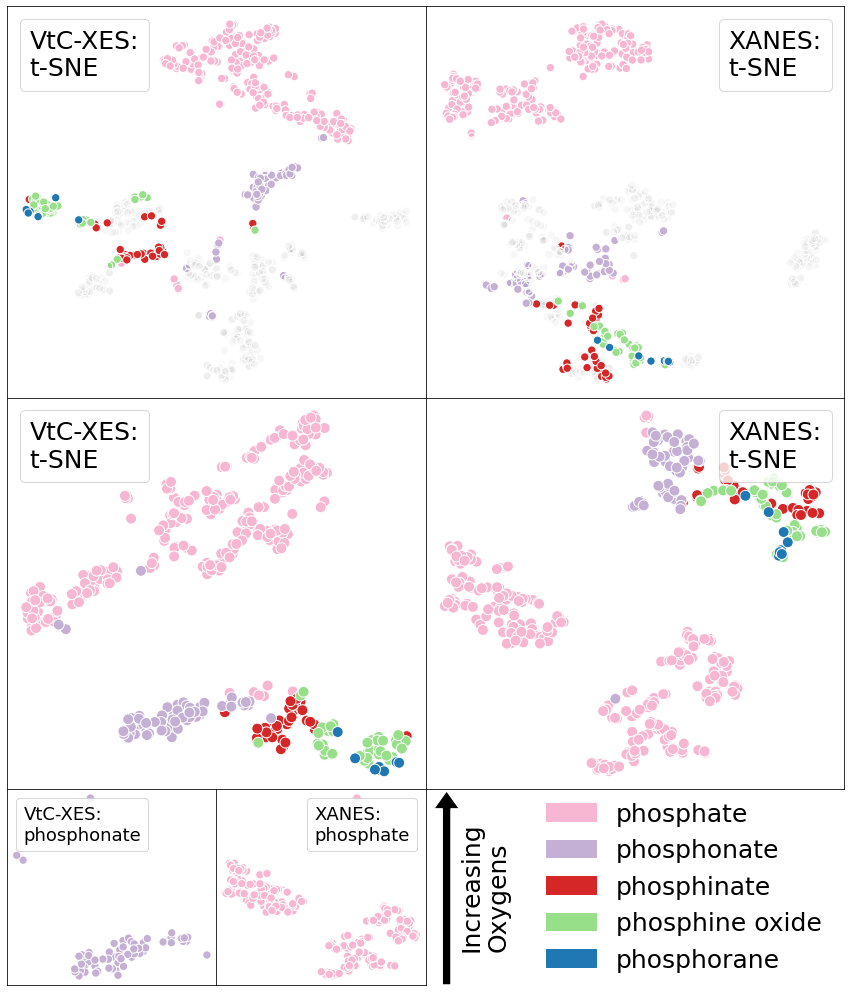

In [361]:
# select = ['phosphite_ester', 'phosphonite', 'phosphinite', 'trialkyl_phosphine']
select = ['phosphate', 'phosphonate', 'phosphinate', 'phosphine_oxide', 'phosphorane']
# select = ['phosphinate', 'phosphenic_acid']

fig = plt.figure(figsize=(15,18))
spec = fig.add_gridspec(nrows=3, ncols=4, height_ratios=[1, 1, 0.5])
plt.subplots_adjust(wspace=0, hspace=0)

for mode in ['XES', 'XANES']:
    kwargs = {'Class': select}
    colormap = plt.cm.tab20
    if mode == 'XES':
        tsnemap = XES_tsnemap
        perp = 16
#         sub_kwargs = {'Class': ['phosphine_oxide']}
        sub_kwargs = {'Class': ['phosphonate']}
        col = 0
    else:
        tsnemap = XANES_tsnemap
        perp = 12
        sub_kwargs = {'Class': ['phosphate']}
        col = 2
        
    #################### tsne plot ensemble
    ax = fig.add_subplot(spec[0, col:col+2])
    tsne_plt = plot_dim_red((fig, ax), X_coord, tsnemap, size=70,
                            colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03,
                            mode=mode, method='t-SNE', fontsize=25, colormap=colormap,
                            edgecolors='w', **kwargs)
    
    #################### tsne plot ensemble: hidden alpha = 0
#     tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, size=120,
#                             colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.0,
#                             mode=mode, method='t-SNE', fontsize=25, colormap=colormap,
#                             edgecolors='w', **kwargs)

    #################### tsne subset plot: using kwargs
    X_subset, tsnemap_sub = get_subset_plots(X_coord, mode=mode, perplexity=perp, **kwargs)
    
    ax = fig.add_subplot(spec[1, col:col+2])
    tsne_sub_plt = plot_dim_red((fig, ax), X_subset, tsnemap_sub,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.3,
                                mode=mode, method=f't-SNE', size=120, fontsize=25,
                                colormap=colormap, edgecolors='w', **kwargs)    
    if mode == 'XES':
        ################### tsne plot ensemble: only show sub-classes
        ax = fig.add_subplot(spec[2, 0])
        method = sub_kwargs['Class'][0]
        tsne_plt = plot_dim_red((fig, ax), X_subset, tsnemap_sub,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.0,
                                mode=mode, method=f'{method}', size=70, fontsize=18,
                                colormap=colormap, edgecolors='w', **Merge(kwargs, sub_kwargs))
    else:
        ################### tsne plot ensemble: only show sub-classes
        ax = fig.add_subplot(spec[2, 1])
        method = sub_kwargs['Class'][0]
        tsne_plt = plot_dim_red((fig, ax), X_subset, tsnemap_sub,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.0,
                                mode=mode, method=f'{method}', size=70, fontsize=18,
                                colormap=colormap, edgecolors='w', **Merge(kwargs, sub_kwargs))
        
        #################### make legend subplot
        labels = ['phosphate', 'phosphonate', 'phosphinate', 'phosphine_oxide', 'phosphorane']
        pattern = "Increasing\nOxygens"
        ax = fig.add_subplot(spec[2, col:col+2])
        fig = make_legend((fig, ax), labels, pattern, include_structures=False)
    
#     #################### DBSCAN on tsne subplot using kwargs
#     sub_select = sub_kwargs['Class']
#     tsne_subset = np.array([tsnemap[c['CID']] for c in X_data_classed if c['Class'] in sub_select])
#     cids_subset = [c['CID'] for c in X_data_classed if c['Class'] in sub_select]
    
#     # apply DBSCAN
#     dbscan_clustering = DBSCAN(eps=4.5, min_samples=1).fit(tsne_subset)
#     dbscan_clustermap = {cid:cluster for cid,cluster in zip(cids_subset, dbscan_clustering.labels_)}
    
#     # create DBSCAN subset clustermap
#     clustermap = {}
#     for c in X_data_classed:
#         if c['Class'] in sub_select:
#             clustermap[c['CID']] = dbscan_clustermap[c['CID']] + 2
#         else:
#             clustermap[c['CID']] = 0

#     select_clusters = np.arange(1, len(np.unique(dbscan_clustering.labels_)))
#     X_subset = [c for c in X_data_classed if clustermap[c['CID']] in select_clusters]

#     colorcodemap = {c['CID']:clustermap[c['CID']] for c in X_data_classed \
#               if clustermap[c['CID']] in select_clusters}
#     binmap = {k:v*0.3 for k,v in colorcodemap.items()}
    
#    #################### DBSCAN tsne plot
#     dbscan_tsne_plt = plot_dim_red(plt.subplots(figsize=(4,4)), X_coord, tsnemap, size=70,
#                                    colorcodemap=clustermap, coloralpha=1., hiddenalpha=0.0,
#                                    mode=mode, method='t-SNE', fontsize=22, edgecolors='w',
#                                    **Merge(kwargs, sub_kwargs))
    
#     chargemap_subset = {compound['CID']:compound['Charge'] for compound in X_subset}
#     make_charge_hist(chargemap_subset, colorcodemap=colorcodemap, bins=15)    
    
#     #################### DBSCAN spaghetti plot using DBSCAN clusters
#     spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode=mode,
#                                    colorcodemap=colorcodemap, binmap=binmap,
#                                    hiddenalpha=0, coloralpha=0.3, **kwargs)
    
#     ############ spaghetti plot of average clusters indicated by DBSCAN
#     avg_spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode=mode,
#                                        colorcodemap=colorcodemap, binmap=binmap, linewidth=4,
#                                        hiddenalpha=0, coloralpha=1., average_bins=True, **kwargs)

#     ############ tsne plot of selected cids for each cluster
#     cid_select = [71447305, 23415768]
#     kwargs = {'CID':cid_select}

#     tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, size=65,
#                             colorcodemap=clustermap, coloralpha=1., hiddenalpha=0.03,
#                             mode=mode, method='t-SNE\nsubset', fontsize=20, **kwargs)
    
#     ############ spaghetti plot of selected cids for each cluster
#     colormap = {}
#     for c in X_data_classed:
#         if c['CID'] in cid_select:
#             colormap[c['CID']] = clustermap[c['CID']]
#     binmap = {k:v*0.3 for k,v in colormap.items()}

#     spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode=mode,
#                                    colorcodemap=colormap, binmap=binmap, linewidth=5,
#                                    hiddenalpha=0, coloralpha=0.6, **kwargs)

#     ################ charge heatmap
   
#     hiddencids = [compound['CID'] for compound in X_coord if compound['Charge'] == -1]
#     charge_kwargs = {'Charge': [-0.9,2.]}
#     scaled_chargemap, min_charge, max_charge = get_scaled_chargemap(X_coord, hiddencids=hiddencids,
#                                                                     **Merge(kwargs, charge_kwargs))
    
#     charge_plt = plot_dim_red(plt.subplots(figsize=(8,8)),  X_coord, tsnemap, mode=mode,
#                               hiddenalpha=0.1, method='t-SNE', fontsize=20,
#                               colormap=plt.cm.viridis, hiddencids=hiddencids, size=30,
#                               colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
#                               cbarlim=(min_charge, max_charge), label='Charge on P', heatmap=True,
#                               **kwargs)

## Subsets that include P bonded to atoms other than C or O

In [34]:
# %matplotlib notebook

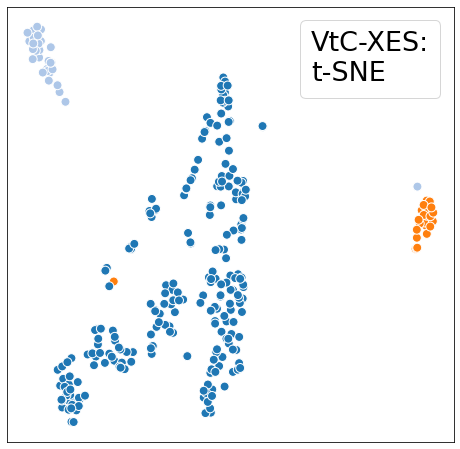

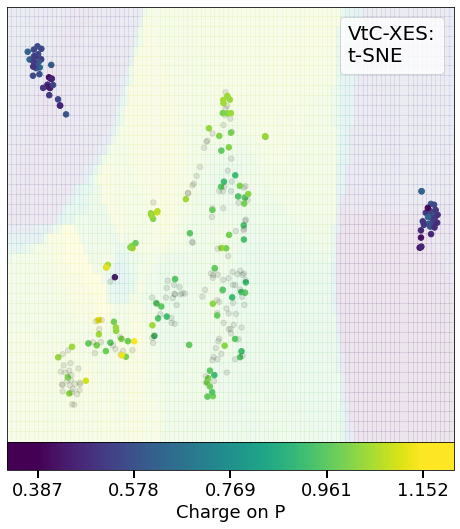

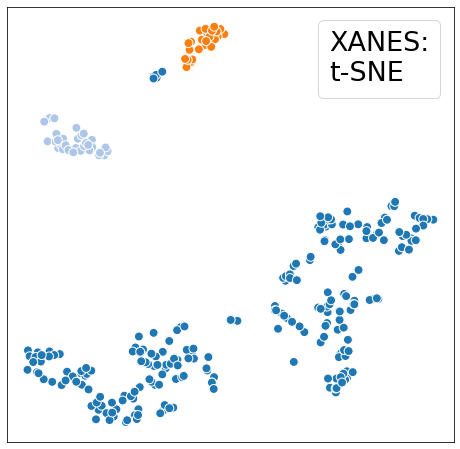

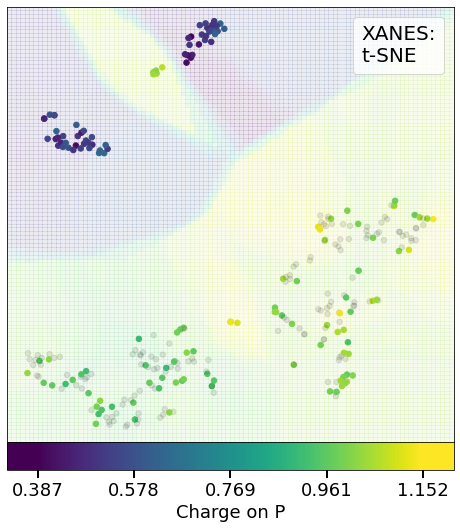

In [35]:
# phosphorane subclasses
# codemap = phosphoranecodemap
# bin_names = list(PHOSPHORANECODES.keys())
# select = ['phosphorane', 'nitrogen_phosphorane','phosphine_oxide','sulfur_phosphorane']

# sulfur subclasses
codemap = sulfurcodemap
select = ['phosphate', 'phosphorothioate', 'dithiophosphate']
bin_names = list(SULFURCODES.keys())

# bins = [1 for name in bin_names]
# hist(bins, [c.replace('_', ' ') for c in bin_names], verbose=False)

XES_TSNE, XANES_TSNE, XES_tsnemap, XANES_tsnemap, X_subset, hiddenCIDs = get_tsne_maps(codemap,
                                                                                       xanes_perplexity=15,
                                                                                       xes_perplexity=20)
XES_UMAP, XANES_UMAP, XES_map, XANES_map, X_subset, hiddenCIDS = get_umaps(codemap)

kwargs = {'Class': select}

for mode in ['XES', 'XANES']:
    if mode == 'XANES':
        umapper, tsnemap = XANES_map, XANES_tsnemap
    else:
        umapper, tsnemap = XES_map, XES_tsnemap
    #################### tsne plot
    tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, tsnemap, size=80,
                            colorcodemap=codemap, coloralpha=1., hiddenalpha=0.03,
                            mode=mode, method='t-SNE', fontsize=27, edgecolors='w',
                            **kwargs)
    
#     umap_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, umapper, size=50,
#                             colorcodemap=codemap, coloralpha=1., hiddenalpha=0.03,
#                             mode=mode, method='UMAP', fontsize=25, **kwargs)
    
    
    #################### charge heatmap
    hiddencids = [compound['CID'] for compound in X_subset if compound['Charge'] == -1]
    charge_kwargs = {'Charge': [-0.9,2.]}
    scaled_chargemap, min_charge, max_charge = get_scaled_chargemap(X_subset, hiddencids=hiddencids, **charge_kwargs)

    charge_plt = plot_dim_red(plt.subplots(figsize=(8,8)),  X_subset, tsnemap, mode=mode,
                              hiddenalpha=0.1, method='t-SNE', fontsize=20,
                              colormap=plt.cm.viridis, hiddencids=hiddencids, size=30,
                              colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
                              cbarlim=(min_charge, max_charge), label='Charge on P', heatmap=True,
                              **kwargs)

### Heirarchical Clustering

In [36]:
# XES_TSNE, XANES_TSNE, XES_tsnemap, XANES_tsnemap, X_coord, hiddenCIDs = get_tsne_maps(coordcodemap)

In [37]:
# Z_XES = linkage(XES_PCA, method='ward')
# Z_XANES = linkage(XANES_PCA, method='ward')

In [38]:
# cmap = plt.cm.viridis(np.linspace(0, 1, 4))
# hierarchy.set_link_color_palette([to_hex(rgb) for rgb in cmap])

In [39]:
# p = 8
# labels = np.arange(1,p + 1)
# Clusters = []

# for mode, Z in zip(['VtC-XES', 'XANES'],[Z_XES, Z_XANES]):
    
#     cluster_labels = fcluster(Z, p, criterion='maxclust')
#     Clusters.append(cluster_labels)
    
#     R = dendrogram(Z, truncate_mode='lastp', p=p, no_plot=True)
#     temp = {R["leaves"][ii]:(labels[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}

#     def llf(xx):
#         return "{}: {}".format(*temp[xx])
    
#     fig, ax = plt.subplots(figsize=(10, 6))
#     plt.title(f'Dendrogram: {mode}', fontsize=26)

#     # plot the top levels of the dendrogram
#     result = dendrogram(Z, truncate_mode='lastp', p=p,
#                         above_threshold_color='gray',
#                         leaf_label_func=llf,
#                         leaf_rotation=90)

#     ax.tick_params(axis='y',direction='in', width=3, length=9)
#     plt.ylabel("Similarity metric", fontsize=20)
#     plt.yticks(fontsize=20)
#     plt.xlabel("Node population", fontsize=20)
#     plt.xticks(fontsize=20)

#     plt.show()

In [40]:
# clustermap1 = {compound['CID']:cluster for compound, cluster in zip(X_coord, Clusters[0])}
# clustermap2 = {compound['CID']:cluster for compound, cluster in zip(X_coord, Clusters[1])}

# classed_CIDs = np.array([c['CID'] for c in X_coord])

# Correlation = {}
# for cluster_label1 in np.arange(1,p+1):
#     Corrs = []
#     for cluster_label2 in np.arange(1,p+1):
#         corr = get_correlation(classed_CIDs, cluster_label1, cluster_label2, clustermap1, clustermap2)
#         Corrs.append(round(corr, 4))
#     Correlation[cluster_label1] = np.max(Corrs)

# Correlation

In [41]:
# for i in range(1,p + 1):
#     bool_arr = cluster_labels == i
#     compoundclasses = [c['Class'] for c in X_data_classed]
#     categorizer = list(compress(compoundclasses, bool_arr))

#     classnames = list(CLASSCODES.keys())[:-1]
#     bins = [np.sum(np.array(categorizer)==classname) for classname in classnames]
    
#     hist(bins, [c.replace('_', ' ') for c in classnames], xlabel=f'Cluster {i}', verbose=True)

# UMAP

In [42]:
# XES_UMAP, XANES_UMAP, XES_map, XANES_map, X_subset, hiddenCIDS = get_umaps(coordcodemap)

# xes_umap = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, XES_map, colorcodemap=coordcodemap,
#              mode='XES', method='UMAP', hiddencids=hiddenCIDs, fontsize=24, size=10)
# xanes_umap = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, XANES_map, colorcodemap=coordcodemap,
#              mode='XANES', method='UMAP', hiddencids=hiddenCIDs, fontsize=24, size=10)

# add_point_pubchem_link(xanes_umap, X_subset)
# add_point_label(xanes_umap, X_subset)

In [43]:
# xes_umap = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, XES_map, colorcodemap=classcodemap,
#              mode='XES', method='UMAP', hiddencids=hiddenCIDs, fontsize=24, size=10)
# xanes_umap = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, XANES_map, colorcodemap=classcodemap,
#              mode='XANES', method='UMAP', hiddencids=hiddenCIDs, fontsize=24, size=10)

In [44]:
# # select = ['phosphite_ester', 'phosphonite', 'phosphinite', 'trialkyl_phosphine']
# # select = ['phosphate', 'phosphonate', 'phosphinate', 'phosphine_oxide', 'phosphorane']
# # select = ['phosphinate', 'phosphenic_acid']
# select = np.unique(list(COORDCODES.keys()))

# kwargs = {'Class': select}
# # print(select)

# for mode in ['XANES']:
#     if mode == 'XANES':
#         umapmap = XANES_map
#     else:
#         umapmap = XES_map  
        
#     colormap = plt.cm.tab20
    
#     #################### reduced plot
#     plot = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, umapmap, size=20,
#                        colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03,
#                        mode=mode, method='UMAP\nColor by Class', fontsize=25, colormap=colormap, **kwargs)
    
# #     add_point_pubchem_link(plot, X_coord)
# #     add_point_label(plot, X_coord)
    
#     #################### charge heatmap
#     hiddencids = [compound['CID'] for compound in X_coord if compound['Charge'] == -1]
#     charge_kwargs = {'Charge': [-0.9,2.]}
#     scaled_chargemap, min_charge, max_charge = get_scaled_chargemap(X_coord, hiddencids=hiddencids,
#                                                                     **Merge(kwargs, charge_kwargs))

#     charge_plt_all = plot_dim_red(plt.subplots(figsize=(8,8)),  X_coord, umapmap, mode=mode,
#                                   hiddenalpha=0.1, method='UMAP', fontsize=20,
#                                   colormap=plt.cm.viridis, hiddencids=hiddencids, size=30,
#                                   colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
#                                   cbarlim=(min_charge, max_charge), label='Charge on P', heatmap=True,
#                                   **kwargs)
    
#     #################### subset plot using kwargs
# #     X_subset, umap_sub = get_subset_plots(X_coord, mode=mode, method='umap', **kwargs)

# #     sub_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, umap_sub,
# #                            colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.1,
# #                            mode=mode, method=f'UMAP on subset\nColor by Class', size=30, fontsize=25,
# #                            colormap=colormap,  **kwargs)
    
# #     add_point_pubchem_link(sub_plt, X_subset)
# #     add_point_label(sub_plt, X_subset)
    
#     #################### charge heatmap on subset
# #     hiddencids = [compound['CID'] for compound in X_subset if compound['Charge'] == -1]
# #     charge_kwargs = {'Charge': [-0.9,2.]}
# #     scaled_chargemap, min_charge, max_charge = get_scaled_chargemap(X_subset, hiddencids=hiddencids,
# #                                                                       **Merge(kwargs, charge_kwargs))

# #     charge_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, umap_sub, mode=mode,
# #                               hiddenalpha=0.1, method='UMAP', fontsize=20,
# #                               colormap=plt.cm.viridis, hiddencids=hiddencids, size=30,
# #                               colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
# #                               cbarlim=(min_charge, max_charge), label='Charge on P', heatmap=True)

#     #################### DBSCAN on umap subplot using kwargs
#     umap_subset = np.array([umapmap[c['CID']] for c in X_data_classed if c['Class'] in select])
#     cids_subset = [c['CID'] for c in X_data_classed if c['Class'] in select]
    
#     # apply DBSCAN
#     dbscan_clustering = DBSCAN(eps=0.8, min_samples=1).fit(umap_subset)
#     dbscan_clustermap = {cid:cluster for cid,cluster in zip(cids_subset, dbscan_clustering.labels_)}
    
#     # create DBSCAN subset clustermap
#     clustermap = {}
#     for c in X_data_classed:
#         if c['Class'] in select:
#             clustermap[c['CID']] = dbscan_clustermap[c['CID']] + 2
#         else:
#             clustermap[c['CID']] = 0

# #     select_clusters = [0,1,2,3]
#     colormap = {c['CID']:clustermap[c['CID']] for c in X_coord}# \
# #               if clustermap[c['CID']] in select_clusters}
#     binmap = {k:v*0.3 for k,v in colormap.items()}
    
#     #################### DBSCAN plot
#     dbscan_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, umapmap, size=30,
#                               colorcodemap=clustermap, coloralpha=1., hiddenalpha=0.03,
#                               mode=mode, method='UMAP\nColor by DBScan', fontsize=20, **kwargs)
    
# #     #################### DBSCAN spaghetti plot using DBSCAN clusters
#     spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,14)), compoundmap, mode=mode,
#                                    colorcodemap=colormap, binmap=binmap,
#                                    hiddenalpha=0, coloralpha=0.3, **kwargs)
    
# #     ############ spaghetti plot of average clusters indicated by DBSCAN
#     avg_spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,14)), compoundmap, mode=mode,
#                                        colorcodemap=colormap, binmap=binmap, linewidth=4,
#                                        hiddenalpha=0, coloralpha=0.6, average_bins=True, **kwargs)

# #     ############ tsne plot of selected cids for each cluster
# #     cid_select = [71447305, 23415768]
# #     kwargs = {'CID':cid_select}

# #     tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, size=65,
# #                             colorcodemap=clustermap, coloralpha=1., hiddenalpha=0.03,
# #                             mode=mode, method='t-SNE\nsubset', fontsize=20, **kwargs)
    
# #     ############ spaghetti plot of selected cids for each cluster
# #     colormap = {}
# #     for c in X_data_classed:
# #         if c['CID'] in cid_select:
# #             colormap[c['CID']] = clustermap[c['CID']]
# #     binmap = {k:v*0.3 for k,v in colormap.items()}

# #     spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode=mode,
# #                                    colorcodemap=colormap, binmap=binmap, linewidth=5,
# #                                    hiddenalpha=0, coloralpha=0.6, **kwargs)

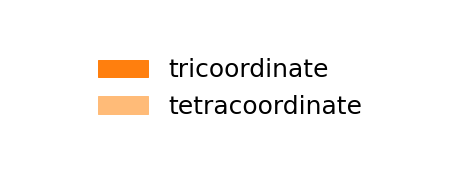

In [210]:
labels= ['tricoordinate', 'tetracoordinate']
pattern = None
plot = plt.subplots(figsize=(8,3))
fig = make_legend(plot, labels, pattern, codes={'tricoordinate':3, 'tetracoordinate':4}, include_structures=False)

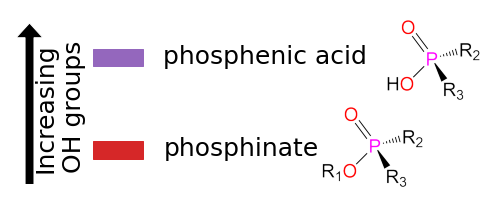

In [211]:
labels= ['phosphenic_acid', 'phosphinate']
pattern = "Increasing\nOH groups"
plot = plt.subplots(figsize=(8,3))
fig = make_legend(plot, labels, pattern)

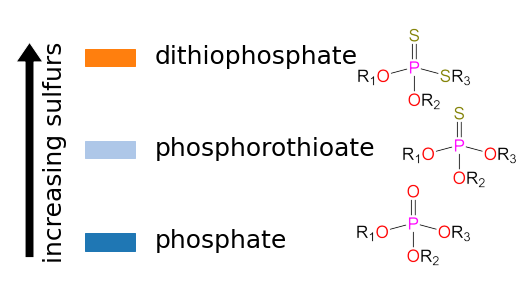

In [212]:
labels = ['dithiophosphate', 'phosphorothioate', 'phosphate']
pattern = "increasing sulfurs"
plot = plt.subplots(figsize=(8,4))
fig = make_legend(plot, labels, pattern, codes=SULFURCODES)

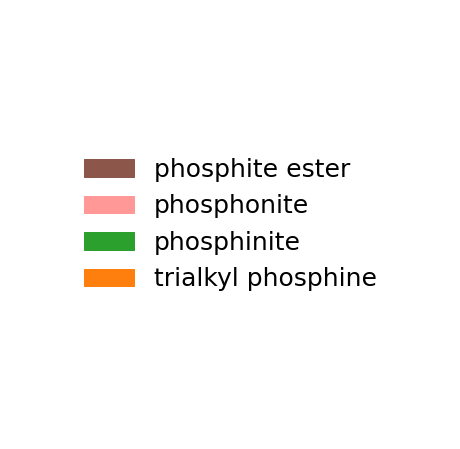

In [213]:
labels = ['phosphite_ester', 'phosphonite', 'phosphinite', 'trialkyl_phosphine']
pattern = "Increasing Oxygens"
plot = plt.subplots(figsize=(8,8))
# fig = make_legend(plot, labels, pattern)
fig = make_legend(plot, labels, None, include_structures=False)

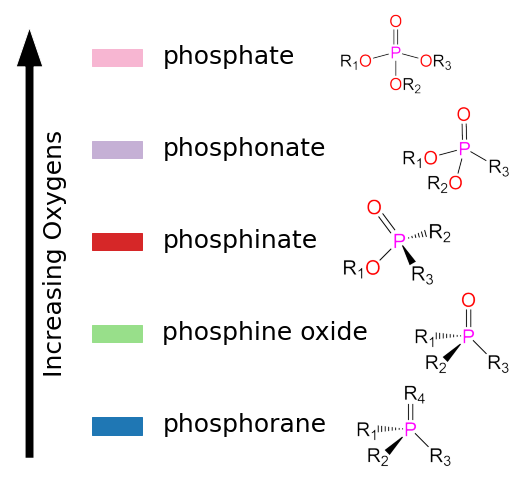

In [340]:
labels = ['phosphate', 'phosphonate', 'phosphinate', 'phosphine_oxide', 'phosphorane']
pattern = "Increasing Oxygens"
plot = plt.subplots(figsize=(8,8))
fig = make_legend(plot, labels, pattern)